In [1]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import time

In [2]:
def show_null(df):
    """
        Simple function to show columns with null values + the count
    """
    
    no_na = True
    null_columns = []

    for i, s in enumerate(df.isna().sum()):
        if s > 0:
            no_na = False
            print(df.columns[i], s)
            null_columns.append(df.columns[i])
            
    if no_na: 
        print('No null values')
        
    return null_columns;

## Initialization and loading

In [3]:
#random seed - 288874

s = 288874
# s = 42
np.random.seed(s)

In [4]:
data = pd.read_csv('COMBO17.csv')
data

,Nr,Rmag,e.Rmag,ApDRmag,mumax,Mcz,e.Mcz,MCzml,chi2red,UjMAG,...,UFS,e.UFS,BFS,e.BFS,VFD,e.VFD,RFS,e.RFS,IFD,e.IFD
0,6,24.995,0.097,0.935,24.214,0.832,0.036,1.400,0.64,-17.67,...,0.01870,0.00239,0.01630,0.001290,0.017300,0.00141,0.01650,0.000434,0.02470,0.00483
1,9,25.013,0.181,-0.135,25.303,0.927,0.122,0.864,0.41,-18.28,...,0.00706,0.00238,0.00420,0.001150,0.003930,0.00182,0.00723,0.000500,0.00973,0.00460
2,16,24.246,0.054,0.821,23.511,1.202,0.037,1.217,0.92,-19.75,...,0.01260,0.00184,0.01830,0.001150,0.018800,0.00167,0.02880,0.000655,0.05700,0.00465
3,21,25.203,0.128,0.639,24.948,0.912,0.177,0.776,0.39,-17.83,...,0.01410,0.00186,0.01180,0.001100,0.009670,0.00204,0.01050,0.000416,0.01340,0.00330
4,26,25.504,0.112,-1.588,24.934,0.848,0.067,1.330,1.45,-17.69,...,0.00514,0.00170,0.00102,0.001270,0.000039,0.00160,0.00139,0.000499,0.00590,0.00444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3457,9990,24.962,0.186,-0.113,25.189,0.960,0.190,0.951,0.89,-18.21,...,0.00643,0.00170,0.00361,0.001150,0.004890,0.00147,0.00625,0.000413,0.00987,0.00323
3458,9992,21.918,0.017,-0.562,23.063,0.770,0.031,0.766,0.90,-20.47,...,0.03700,0.00218,0.04500,0.001310,0.051300,0.00173,0.07210,0.000542,0.10200,0.00477
3459,9995,23.701,0.051,-0.437,24.053,0.775,0.121,1.330,0.60,-18.76,...,0.02050,0.00223,0.01850,0.001090,0.014500,0.00182,0.01580,0.000468,0.01860,0.00484
3460,9996,23.473,0.098,-1.114,25.075,0.926,0.087,0.870,1.01,-19.67,...,0.01150,0.00225,0.00809,0.001190,0.011400,0.00166,0.01070,0.000454,0.01930,0.00390


## Preprocessing

In [5]:
data.describe()

,Nr,Rmag,e.Rmag,ApDRmag,mumax,Mcz,e.Mcz,MCzml,chi2red,UjMAG,...,UFS,e.UFS,BFS,e.BFS,VFD,e.VFD,RFS,e.RFS,IFD,e.IFD
count,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,...,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000
mean,5099.237435,23.939266,0.106156,-0.190947,24.181846,0.728503,0.090381,0.770000,1.167392,-17.866005,...,0.015965,0.002003,0.021882,0.001174,0.029518,0.001682,0.039055,0.000479,0.048502,0.004043
std,2826.911998,1.435899,0.083147,0.452994,1.017225,0.319010,0.061970,0.375989,0.682852,1.965501,...,0.025359,0.000335,0.064187,0.000343,0.119034,0.000631,0.164048,0.000199,0.187690,0.001486
min,6.000000,16.572000,0.001000,-4.700000,18.112000,0.007000,0.000000,0.000000,0.140000,-23.210000,...,-0.002430,0.001510,-0.001040,0.000843,-0.001830,0.001180,0.000912,0.000368,0.000056,0.003040
25%,2661.250000,23.099000,0.039000,-0.425000,23.624250,0.519000,0.036000,0.502250,0.730000,-19.070000,...,0.006120,0.001770,0.005580,0.001020,0.005922,0.001420,0.006860,0.000427,0.011000,0.003450
50%,5158.500000,24.073500,0.080000,-0.141000,24.387500,0.810000,0.076500,0.826500,1.020000,-18.210000,...,0.010200,0.001930,0.010300,0.001110,0.011600,0.001570,0.014000,0.000451,0.019100,0.003780
75%,7493.500000,25.029750,0.160000,0.089000,24.957500,0.981750,0.141000,1.024750,1.440000,-17.300000,...,0.017600,0.002150,0.020075,0.001240,0.023600,0.001800,0.029700,0.000488,0.039100,0.004270
max,9997.000000,27.000000,0.311000,1.462000,25.833000,1.379000,0.233000,1.400000,11.910000,-7.910000,...,0.410000,0.006320,1.470000,0.008290,3.170000,0.015900,4.630000,0.006830,5.290000,0.045500


In [6]:
show_null(data)

VbMAG 1
e.VbMAG 1
S280MAG 24
e.S280MAG 24


['VbMAG', 'e.VbMAG', 'S280MAG', 'e.S280MAG']

In [7]:
data[data.isna().any(axis=1)].loc[:,show_null(data)]

VbMAG 1
e.VbMAG 1
S280MAG 24
e.S280MAG 24


,VbMAG,e.VbMAG,S280MAG,e.S280MAG
22,-19.17,0.47,NaN,NaN
40,-18.38,0.44,NaN,NaN
89,-18.57,0.45,NaN,NaN
159,-19.84,0.40,NaN,NaN
363,-17.54,1.57,NaN,NaN
385,-19.81,0.39,NaN,NaN
415,-18.83,0.52,NaN,NaN
492,-17.16,0.11,NaN,NaN
576,-17.27,0.50,NaN,NaN
969,-14.25,0.13,NaN,NaN


In [8]:
data_wo_null = data.dropna() # drop the rows with null values 

In [9]:
show_null(data_wo_null)

No null values


[]

In [10]:
data_wo_null.columns # All the columns

Index(['Nr', 'Rmag', 'e.Rmag', 'ApDRmag', 'mumax', 'Mcz', 'e.Mcz', 'MCzml',
       'chi2red', 'UjMAG', 'e.UjMAG', 'BjMAG', 'e.BjMAG', 'VjMAG', 'e.VjMAG',
       'usMAG', 'e.usMAG', 'gsMAG', 'e.gsMAG', 'rsMAG', 'e.rsMAG', 'UbMAG',
       'e.UbMAG', 'BbMAG', 'e.BbMAG', 'VbMAG', 'e.VbMAG', 'S280MAG',
       'e.S280MAG', 'W420FE', 'e.W420FE', 'W462FE', 'e.W462FE', 'W485FD',
       'e.W485FD', 'W518FE', 'e.W518FE', 'W571FS', 'e.W571FS', 'W604FE',
       'e.W604FE', 'W646FD', 'e.W646FD', 'W696FE', 'e.W696FE', 'W753FE',
       'e.W753FE', 'W815FS', 'e.W815FS', 'W856FD', 'e.W856FD', 'W914FD',
       'e.W914FD', 'W914FE', 'e.W914FE', 'UFS', 'e.UFS', 'BFS', 'e.BFS', 'VFD',
       'e.VFD', 'RFS', 'e.RFS', 'IFD', 'e.IFD'],
      dtype='object')

In [11]:
# Drop useless columns which are useless in our analysis like IDs or columns related to redshift
useless_columns = ['Nr', 'Mcz', 'e.Mcz', 'MCzml', 'chi2red']

y = data_wo_null['Mcz']
X = data_wo_null.drop(columns=useless_columns)

In [12]:
# Python parameters for displaying all the columns and rows in the dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [13]:
def color_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for strings>0.85, 
    black otherwise.
    """
    color = 'red' if abs(val) >0.85 else 'black'
    return 'color: %s' % color

# Show correlation matrix between values. Correlation higher than 85% is highlighted with red 
X.corr().style.applymap(color_red)

In [14]:
# Print and count highly correlated variables 

corr_mat = X.corr()
corr_cols = corr_mat.columns

corr_count = dict([(key, 0) for key in corr_cols]) #initialize empty dict

for i in range(len(corr_mat)):
    for j in range(i+1,len(corr_mat)):
        if corr_mat.iloc[i,j]>0.85:
            print(f"{corr_cols[i]} , {corr_cols[j]} \n {X.corr().iloc[i,j]} \n")
            
            corr_count[corr_cols[i]] += 1
            corr_count[corr_cols[j]] += 1

Rmag , e.Rmag 
 0.8602478014851609 

Rmag , mumax 
 0.9322496941996998 

UjMAG , BjMAG 
 0.9332521757722787 

UjMAG , VjMAG 
 0.9610882753890029 

UjMAG , usMAG 
 0.9998650449261756 

UjMAG , gsMAG 
 0.9701244061643455 

UjMAG , rsMAG 
 0.9548529314924481 

UjMAG , UbMAG 
 0.9999862834003609 

UjMAG , BbMAG 
 0.9754756023418999 

UjMAG , VbMAG 
 0.9609807695350575 

UjMAG , S280MAG 
 0.9634151768426951 

e.UjMAG , e.usMAG 
 0.9997472053691384 

e.UjMAG , e.UbMAG 
 1.0 

BjMAG , VjMAG 
 0.9507275189065844 

BjMAG , usMAG 
 0.9323282244562745 

BjMAG , gsMAG 
 0.9540057511572999 

BjMAG , rsMAG 
 0.9475970043839912 

BjMAG , UbMAG 
 0.9328309338552281 

BjMAG , BbMAG 
 0.9578356133978456 

BjMAG , VbMAG 
 0.9506936264755236 

BjMAG , S280MAG 
 0.885382438755853 

e.BjMAG , e.VjMAG 
 0.9550670263312635 

e.BjMAG , e.gsMAG 
 0.955269693605669 

e.BjMAG , e.rsMAG 
 0.9549842150987498 

e.BjMAG , e.BbMAG 
 1.0 

e.BjMAG , e.VbMAG 
 0.9550670263312635 

VjMAG , usMAG 
 0.959432413786591 

VjM

In [15]:
# Show which variable is highly correlated with any other variable how many times
corr_count

{'Rmag': 2,
 'e.Rmag': 1,
 'ApDRmag': 0,
 'mumax': 1,
 'UjMAG': 9,
 'e.UjMAG': 2,
 'BjMAG': 9,
 'e.BjMAG': 5,
 'VjMAG': 9,
 'e.VjMAG': 5,
 'usMAG': 9,
 'e.usMAG': 2,
 'gsMAG': 9,
 'e.gsMAG': 5,
 'rsMAG': 9,
 'e.rsMAG': 5,
 'UbMAG': 9,
 'e.UbMAG': 2,
 'BbMAG': 9,
 'e.BbMAG': 5,
 'VbMAG': 9,
 'e.VbMAG': 5,
 'S280MAG': 9,
 'e.S280MAG': 0,
 'W420FE': 0,
 'e.W420FE': 0,
 'W462FE': 17,
 'e.W462FE': 0,
 'W485FD': 18,
 'e.W485FD': 0,
 'W518FE': 18,
 'e.W518FE': 0,
 'W571FS': 17,
 'e.W571FS': 0,
 'W604FE': 17,
 'e.W604FE': 0,
 'W646FD': 17,
 'e.W646FD': 0,
 'W696FE': 16,
 'e.W696FE': 0,
 'W753FE': 16,
 'e.W753FE': 0,
 'W815FS': 16,
 'e.W815FS': 0,
 'W856FD': 16,
 'e.W856FD': 0,
 'W914FD': 16,
 'e.W914FD': 0,
 'W914FE': 16,
 'e.W914FE': 0,
 'UFS': 4,
 'e.UFS': 0,
 'BFS': 17,
 'e.BFS': 0,
 'VFD': 17,
 'e.VFD': 8,
 'RFS': 17,
 'e.RFS': 18,
 'IFD': 16,
 'e.IFD': 1}

## Preparing the dataset

In [16]:
# Split the unpreprocessed dataset into test and train and save them into .csv files
train, test = train_test_split(data_wo_null, random_state= s, train_size=2500/len(y)) #split dataset into train and test(evaluation)

train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)

train_df = train_df.drop(columns = ['Nr', 'e.Mcz', 'MCzml', 'chi2red'])
test_df = test_df.drop(columns = ['Nr', 'e.Mcz', 'MCzml', 'chi2red'])

train_df.to_csv(f'COMBO17pca_{s}.csv',index= False)
test_df.to_csv(f'COMBO17eval_{s}.csv',index= False)

In [17]:
# Return settings back to normal
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= s, train_size=2500/len(y))
X_train

,Rmag,e.Rmag,ApDRmag,mumax,UjMAG,...,e.VFD,RFS,e.RFS,IFD,e.IFD
1878,23.925,0.060,-0.199,24.465,-18.67,...,0.00139,0.01550,0.000400,0.02080,0.00330
2416,24.167,0.090,-0.089,24.544,-14.46,...,0.00198,0.01410,0.000495,0.01860,0.00461
790,23.027,0.033,-0.173,23.330,-21.01,...,0.00224,0.03840,0.000661,0.05640,0.00686
1734,23.840,0.062,-0.070,23.606,-17.93,...,0.00216,0.02000,0.000433,0.02430,0.00365
2215,24.112,0.068,0.019,24.120,-15.61,...,0.00135,0.01720,0.000451,0.01560,0.00338
...,...,...,...,...,...,...,...,...,...,...,...
3123,22.200,0.027,-0.883,23.338,-18.25,...,0.00147,0.04090,0.000433,0.04080,0.00377
2977,25.502,0.308,0.063,25.667,-18.11,...,0.00143,0.00504,0.000451,0.01570,0.00367
44,23.861,0.056,0.013,23.936,-18.19,...,0.00149,0.02020,0.000439,0.02170,0.00417
3113,25.466,0.258,0.241,25.171,-17.94,...,0.00151,0.00636,0.000438,0.01460,0.00388


In [19]:
# X_train.iloc[0,0], y_train.iloc[0]

In [20]:
# test_df

In [21]:
# print(f'{data_wo_null.loc[1878]} \n\n Mcz = {data_wo_null.loc[1878]["Mcz"]}')

## PCA

In [22]:
# initializing the objects for normal PCA and PCA with normalized dataset
pca = PCA()
pca_z = PCA()

In [23]:
# Normalize the dataset
znorm = StandardScaler()
znorm.fit(X_train)
X_train_hat = znorm.transform(X_train)

In [24]:
# Fit train data to pca 
pca.fit(X_train)
pca_z.fit(X_train_hat)

PCA()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


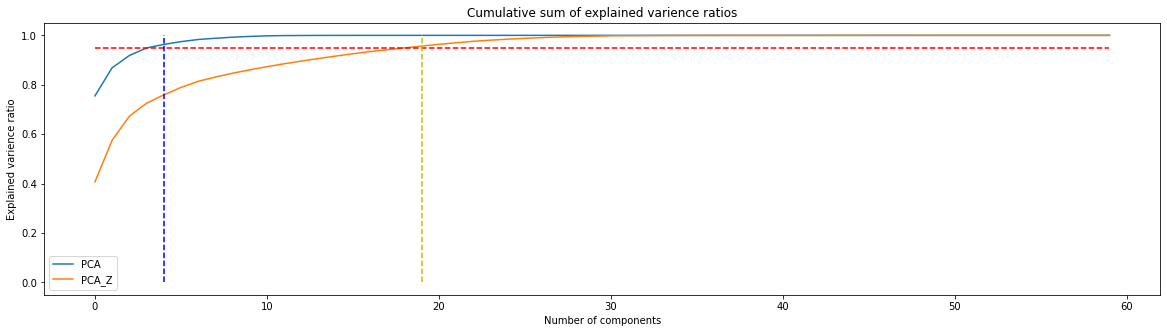

In [25]:
# Plot visualization for Cumulative sum of explained variance ratios

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(np.cumsum(pca.explained_variance_ratio_), label='PCA')
ax.plot(np.cumsum(pca_z.explained_variance_ratio_), label='PCA_Z')
ax.plot(range(X_train.shape[1]), 0.95*np.ones(X_train.shape[1]), 'r--')
ax.plot(np.where(np.cumsum(pca.explained_variance_ratio_)>0.95)[0][0]*np.ones(X_train.shape[1]), \
        np.linspace(0,1,60), 'b--')
ax.plot(np.where(np.cumsum(pca_z.explained_variance_ratio_)>0.95)[0][0]*np.ones(X_train.shape[1]), \
        np.linspace(0,1,60), 'y--')
ax.set(title='Cumulative sum of explained varience ratios')
ax.legend(loc='best')
ax.set_xlabel("Number of components")
ax.set_ylabel("Explained varience ratio")

fig.savefig('cumsum_pca.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


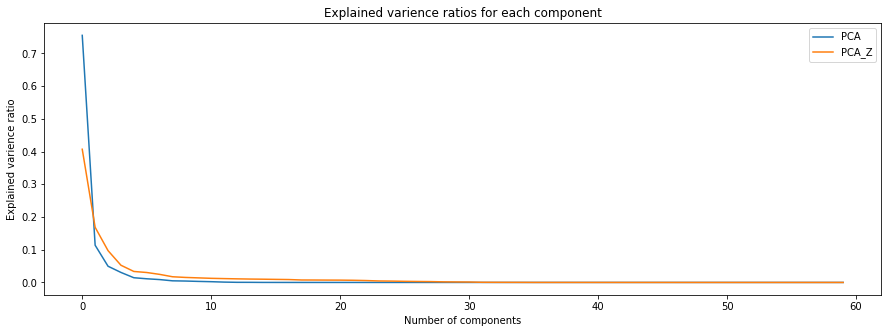

In [26]:
# Plot visualization for explained variance ratios for each component
# It can be seen that PCA without normalization starts with high explained variance ratio
# than that with normalization
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(pca.explained_variance_ratio_, label='PCA')
ax.plot(pca_z.explained_variance_ratio_, label='PCA_Z')
ax.set(title='Explained varience ratios for each component')
ax.legend(loc='best')
ax.set_xlabel("Number of components")
ax.set_ylabel("Explained varience ratio")

fig.savefig('evr_pca.eps', format='eps')

In [25]:
print("Component vs Cum. sum of explained var. ratio")
for i, p in enumerate(np.cumsum(pca.explained_variance_ratio_)):
    print(i+2, p)
# it reaches 99% explanined variance ratio with 8 components 

Component vs Cum. sum of explained var. ratio
2 0.7550242349565086
3 0.8687122635903072
4 0.9182617098586945
5 0.9488650072797159
6 0.9632716775284625
7 0.9744713874317512
8 0.983247453519892
9 0.9882065282306121
10 0.9925005083170956
11 0.9956972446799837
12 0.9980030199380702
13 0.9990512002568297
14 0.9994352624555348
15 0.999774316436366
16 0.9998653283788849
17 0.9999134931153796
18 0.9999360993156736
19 0.999952920617937
20 0.9999624473626937
21 0.9999716554026358
22 0.999979119697258
23 0.999983196228714
24 0.9999865320553608
25 0.9999891569264108
26 0.9999914001626722
27 0.9999928580809428
28 0.9999942567632174
29 0.9999952720844819
30 0.9999961978886734
31 0.9999969807291667
32 0.9999975617689124
33 0.9999980066221482
34 0.9999984165256834
35 0.9999987281418866
36 0.9999990006173209
37 0.9999992090519721
38 0.9999993514658208
39 0.999999475629452
40 0.9999995951663131
41 0.9999997048915772
42 0.9999997890151526
43 0.9999998584264542
44 0.9999998885542821
45 0.9999999123168405


In [26]:
print("Component vs Cum. sum of explained var. ratio for normalized data")
for i, p in enumerate(np.cumsum(pca_z.explained_variance_ratio_)):
    print(i+2, p)
# it reaches 99% explanined variance ratio with 26 components

Component vs Cum. sum of explained var. ratio for normalized data
2 0.40700486315708856
3 0.5754845023694951
4 0.6726791483702061
5 0.7252798802494579
6 0.7588463297790974
7 0.7892279248236755
8 0.8139076169764637
9 0.8312921299210658
10 0.8466064503267307
11 0.8605592241063437
12 0.873149763573349
13 0.8849007678862711
14 0.8958813147523081
15 0.906224915675409
16 0.9161402806662904
17 0.9255103437985637
18 0.9343766395398236
19 0.9418815371400393
20 0.9492698024372027
21 0.9564543864873221
22 0.9635186268553075
23 0.9701372297228448
24 0.9759431612565063
25 0.9804560097620872
26 0.9845463776376617
27 0.9879504309747011
28 0.9908841234805624
29 0.9934781273685971
30 0.9953088829583014
31 0.9968252238513736
32 0.9981117853439224
33 0.9985863085376678
34 0.9989314413652536
35 0.9992110010349919
36 0.9994306963547275
37 0.9995171867795052
38 0.9995915509914266
39 0.9996608904825128
40 0.9997202589827663
41 0.9997774365023077
42 0.9998130318327911
43 0.9998468769443937
44 0.99987336291071

## Projections

In [27]:
Qm = pca.transform(X_train)

Qm_z = pca_z.transform(X_train_hat)

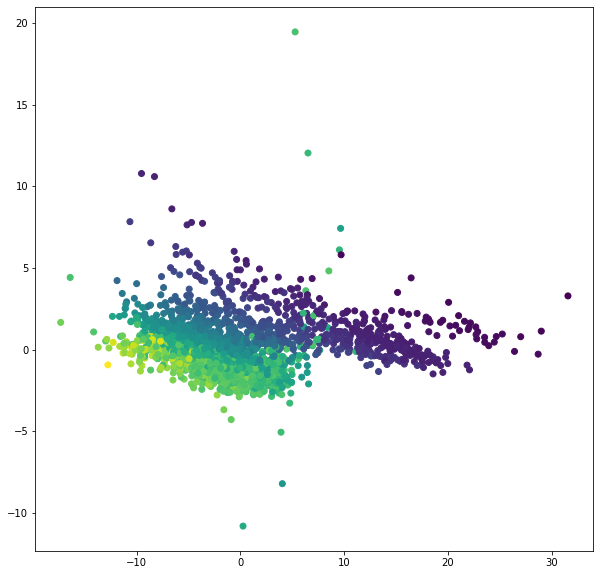

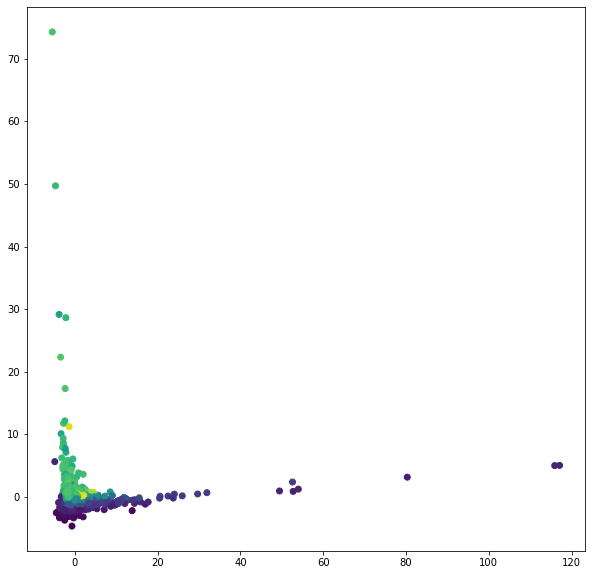

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(Qm[:,0], Qm[:,2], c=y_train)
fig.savefig('qm0_2.eps', format='eps')

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(Qm_z[:,0], Qm_z[:,2], c=y_train)
fig.savefig('qmz0_2.eps', format='eps')

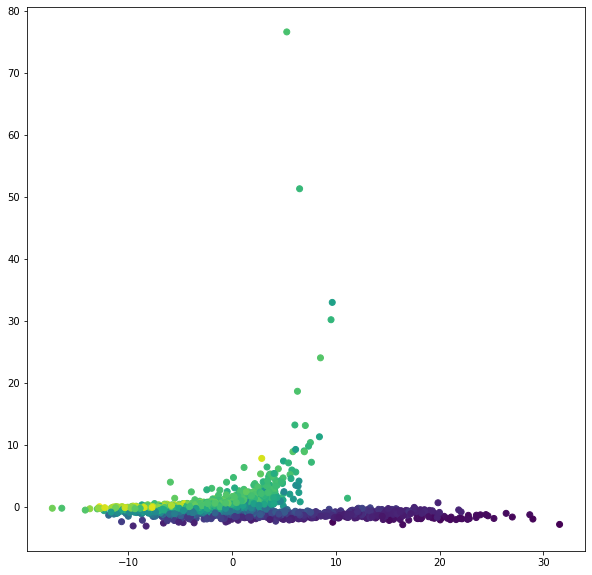

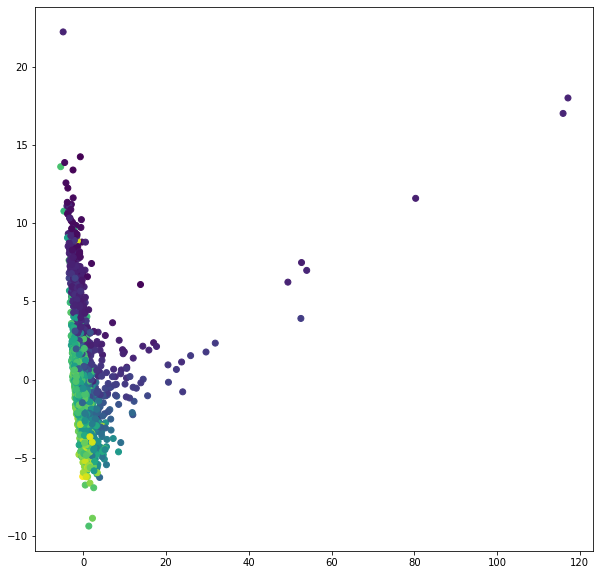

In [29]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(Qm[:,0], Qm[:,1], c=y_train)
fig.savefig('qm0_1.eps', format='eps')

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(Qm_z[:,0], Qm_z[:,1], c=y_train)
fig.savefig('qmz0_1.eps', format='eps')

In [30]:
# basic function to calculate MRE
def mre_f(y_pred, y_true):
    mre_ = sum(abs(y_pred-y_true)/abs(y_true))/len(y_test)
    return mre_

## Regression analysis with normalized data w/o PCA

In [31]:
knn_wo_PCA = KNeighborsRegressor(weights='distance')
s = time.time()
knn_wo_PCA.fit(X_train_hat, y_train)
y_pred_wo_PCA = knn_wo_PCA.predict(znorm.transform(X_test))
e = time.time()
print("\n\nRegression analysis with normalized data w/o PCA\n--------------------------------------\n")
print(f"r2: {round(r2_score(y_pred_wo_PCA, y_test),3)}, MAE: {round(mean_absolute_error(y_pred_wo_PCA, y_test), 3)}, MRE: {round(mre_f(y_pred_wo_PCA,y_test), 3)}, Time: {round(e-s, 3)}")



Regression analysis with normalized data w/o PCA
--------------------------------------

r2: 0.896, MAE: 0.067, MRE: 0.123, Time: 0.31


## Regression analysis w/o normalized data w/o PCA

In [32]:
knn_wo_PCA = KNeighborsRegressor(weights='distance')
s = time.time()
knn_wo_PCA.fit(X_train, y_train)
y_pred_wo_PCA = knn_wo_PCA.predict(X_test)
e = time.time()
print("\n\nRegression analysis w/o normalized data w/o PCA\n--------------------------------------\n")
print(f"r2: {round(r2_score(y_pred_wo_PCA, y_test),3)}, MAE: {round(mean_absolute_error(y_pred_wo_PCA, y_test), 3)}, MRE: {round(mre_f(y_pred_wo_PCA,y_test), 3)}, Time: {round(e-s, 3)}")



Regression analysis w/o normalized data w/o PCA
--------------------------------------

r2: 0.981, MAE: 0.03, MRE: 0.048, Time: 0.131


## Regression analysis with normalized data for PCA

In [33]:
pca_20z = PCA(20)
pca_20z.fit(X_train_hat)
pcs = pca_20z.transform(X_train_hat)

In [35]:
accuracies = []
mae = []
mre = []
print("\n\nRegression analysis with normalized data for PCA\n--------------------------------------\n")
for i in range(2,30):
    pca_30z = PCA(i)
    pca_30z.fit(X_train_hat)
    pcs = pca_30z.transform(X_train_hat)
    
    knn = KNeighborsRegressor(weights='distance')
    s = time.time()
    knn.fit(pcs, y_train)
    y_pred = knn.predict(pca_30z.transform(znorm.transform(X_test)))
    e = time.time()
    
    accuracies.append(r2_score(y_pred, y_test))
    mae.append(mean_absolute_error(y_pred, y_test))
    mre.append(mre_f(y_pred,y_test))

    print(f"#Components: {i}, r2: {round(r2_score(y_pred, y_test),3)}, MAE: {round(mean_absolute_error(y_pred, y_test), 3)}, MRE: {round(mre_f(y_pred, y_test), 3)}, Time: {round(e-s, 3)}")



Regression analysis with normalized data for PCA
--------------------------------------

#Components: 2, r2: 0.486, MAE: 0.147, MRE: 0.282, Time: 0.017
#Components: 3, r2: 0.923, MAE: 0.061, MRE: 0.099, Time: 0.014
#Components: 4, r2: 0.937, MAE: 0.055, MRE: 0.083, Time: 0.016
#Components: 5, r2: 0.933, MAE: 0.056, MRE: 0.088, Time: 0.031
#Components: 6, r2: 0.946, MAE: 0.05, MRE: 0.08, Time: 0.025
#Components: 7, r2: 0.945, MAE: 0.049, MRE: 0.08, Time: 0.029
#Components: 8, r2: 0.958, MAE: 0.043, MRE: 0.073, Time: 0.037
#Components: 9, r2: 0.952, MAE: 0.047, MRE: 0.079, Time: 0.066
#Components: 10, r2: 0.945, MAE: 0.05, MRE: 0.085, Time: 0.148
#Components: 11, r2: 0.937, MAE: 0.053, MRE: 0.091, Time: 0.091
#Components: 12, r2: 0.928, MAE: 0.056, MRE: 0.099, Time: 0.091
#Components: 13, r2: 0.923, MAE: 0.058, MRE: 0.103, Time: 0.114
#Components: 14, r2: 0.919, MAE: 0.059, MRE: 0.106, Time: 0.11
#Components: 15, r2: 0.912, MAE: 0.061, MRE: 0.109, Time: 0.117
#Components: 16, r2: 0.904

### With the PCA and normalization it is about 7 times faster to reach even higher for the near R2 score, with as few as 3 components

## Regression analysis without normalization

In [36]:
pca_20 = PCA(20)
pca_20.fit(X_train)
pcs_wo_norm = pca_20.transform(X_train)

In [37]:
accuracies = []
mae = []
mre = []
print("\n\nRegression analysis without normalization\n--------------------------------------\n")
for i in range(2,30):
    pca_30 = PCA(i)
    pca_30.fit(X_train)
    pcs = pca_30.transform(X_train)
    
    knn = KNeighborsRegressor(weights='distance')
    s = time.time()
    knn.fit(pcs, y_train)
    y_pred = knn.predict(pca_30.transform(X_test))
    e = time.time()
    
    accuracies.append(r2_score(y_pred, y_test))
    mae.append(mean_absolute_error(y_pred, y_test))
    mre.append(mre_f(y_pred,y_test))
    
    print(f"#Components: {i}, r2: {round(r2_score(y_pred, y_test),3)}, MAE: {round(mean_absolute_error(y_pred, y_test), 3)}, MRE: {round(mre_f(y_pred,y_test), 3)}, Time: {round(e-s, 3)}")



Regression analysis without normalization
--------------------------------------

#Components: 2, r2: 0.948, MAE: 0.054, MRE: 0.094, Time: 0.026
#Components: 3, r2: 0.971, MAE: 0.037, MRE: 0.056, Time: 0.018
#Components: 4, r2: 0.978, MAE: 0.033, MRE: 0.052, Time: 0.018
#Components: 5, r2: 0.977, MAE: 0.034, MRE: 0.052, Time: 0.022
#Components: 6, r2: 0.976, MAE: 0.035, MRE: 0.053, Time: 0.025
#Components: 7, r2: 0.976, MAE: 0.035, MRE: 0.053, Time: 0.032
#Components: 8, r2: 0.981, MAE: 0.031, MRE: 0.049, Time: 0.026
#Components: 9, r2: 0.981, MAE: 0.031, MRE: 0.049, Time: 0.029
#Components: 10, r2: 0.981, MAE: 0.03, MRE: 0.048, Time: 0.049
#Components: 11, r2: 0.982, MAE: 0.03, MRE: 0.048, Time: 0.037
#Components: 12, r2: 0.981, MAE: 0.03, MRE: 0.048, Time: 0.038
#Components: 13, r2: 0.982, MAE: 0.03, MRE: 0.048, Time: 0.046
#Components: 14, r2: 0.981, MAE: 0.03, MRE: 0.048, Time: 0.072
#Components: 15, r2: 0.981, MAE: 0.03, MRE: 0.048, Time: 0.053
#Components: 16, r2: 0.981, MAE: 0

### With the PCA it is about 3 times faster to reach the same R2 score, with 10 components